# Barnstable and Long-Run Risk

## HBS Case

### *The Risk of Stocks in the Long-Run: The Barnstable College Endowment*

***

# Section 2:
 Estimating Underperformance

### Data

Use the returns on the S&P 500 ($r^m$) and 1-month T-bills, ($r^f$) provided in `barnstable_analysis_data.xlsx`.
* Data goes through `END_YR=2024`.

Barnstable's estimates of mean and volatility are based on the subsample of 1965 to 1999.
* We consider this subsample, as well as 2000-{END_YR}, as well as the full sample of 1926-{END_YR}.

### Notation

* $r$ = level return rates
* $R$ = cumulative return factor
* $\texttt{r}$ = log return rates

$$ R \equiv 1+r$$

$$ \texttt{r} \equiv \ln(1+r) = \ln(R)$$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data
raw_df = pd.read_excel("../data/barnstable_analysis_data.xlsx", sheet_name="data")
raw_df.head()

,date,SPX,TB1M
0,1926-01-30,-0.001783,0.003061
1,1926-02-27,-0.033297,0.002612
2,1926-03-31,-0.057708,0.002601
3,1926-04-30,0.038522,0.002270
4,1926-05-28,0.013623,0.002691


### Question 1: Summary Statistics

(a) Report the following (annualized) statistics.

| | 1965-1999 | | | 2000-{END_YR} | | | 1926-{END_YR} | |
|---|---|---|---|---|---|---|---|---|
| | mean | vol | | mean | vol | | mean | vol |
| **levels** | $r^m$ | | | | | | | |
| | $\tilde{r}^m$ | | | | | | | |
| | $r^f$ | | | | | | | |
| **logs** | $\texttt{r}^m$ | | | | | | | |
| | $\tilde{\texttt{r}}^m$ | | | | | | | |
| | $\texttt{r}_f$ | | | | | | | |

In [13]:
# Question 2.1 Part (a) Here

import numpy as np
import pandas as pd

# Load data
df = pd.read_excel("../data/barnstable_analysis_data.xlsx", sheet_name="data")

# Rename columns for clarity
df = df.rename(columns={"SPX": "r_m", "TB1M": "r_f"})

# Extract year from the date
df["year"] = pd.to_datetime(df["date"]).dt.year

# Compute cumulative factors and log returns
df["R_m"] = 1 + df["r_m"]
df["R_f"] = 1 + df["r_f"]
df["r_m_log"] = np.log(df["R_m"])
df["r_f_log"] = np.log(df["R_f"])

#calculate excess returns
df['r̃']     =   df['r_m']-df['r_f']
df['R̃']     =   1+df['r̃']
df['r̃_log'] =   np.log(df["R̃"])

# Helper function to compute annualised mean and volatility
def summary_stats(data, start, end):
    subset = data[(data["year"] >= start) & (data["year"] <= end)]
    stats = {
        "r_m_mean": subset["r_m"].mean() * 12,
        "r_m_vol": subset["r_m"].std(ddof=1) * np.sqrt(12),
        "r_f_mean": subset["r_f"].mean() * 12,
        "r_f_vol": subset["r_f"].std(ddof=1) * np.sqrt(12),
        "r̃_mean": subset["r̃"].mean() * 12,
        "r̃_vol": subset["r̃"].std(ddof=1) * np.sqrt(12),
        "r_m_log_mean": subset["r_m_log"].mean() * 12,
        "r_m_log_vol": subset["r_m_log"].std(ddof=1) * np.sqrt(12),
        "r_f_log_mean": subset["r_f_log"].mean() * 12,
        "r_f_log_vol": subset["r_f_log"].std(ddof=1) * np.sqrt(12),
        "r̃_log_mean": subset["r̃_log"].mean() * 12,
        "r̃_log_vol": subset["r̃_log"].std(ddof=1) * np.sqrt(12),
    }
    return pd.Series(stats)

#helper function to print
def block(statistics: pd.Series, period_label: str) -> pd.DataFrame:
    rows = pd.MultiIndex.from_tuples(
        [("levels", "r^m"), ("levels", "r̃^m"), ("levels", "r^f"),
         ("logs",   "r"),   ("logs",   "r̃"),   ("logs",   "r_f")],
        names=["", ""]
    )
    return pd.DataFrame({
        (period_label, "mean"): [statistics["r_m_mean"], statistics["r̃_mean"], statistics["r_f_mean"],
                          statistics["r_m_log_mean"], statistics["r̃_log_mean"], statistics["r_f_log_mean"]],
        (period_label, "vol"):  [statistics["r_m_vol"],  statistics["r̃_vol"],  statistics["r_f_vol"],
                          statistics["r_m_log_vol"],  statistics["r̃_log_vol"],  statistics["r_f_log_vol"]],
    }, index=rows)

# Define sample periods
samples = [(1965, 1999), (2000, 2024), (1926, 2024)]

# Compute stats for each sample
stats_65_99 = summary_stats(df, *samples[0])
stats_00_24 = summary_stats(df, *samples[1])
stats_full  = summary_stats(df, *samples[2])

# Organise into table
table = pd.concat([
    block(stats_65_99, "1965-1999"),
    block(stats_00_24, f"2000-2024"),
    block(stats_full,  f"1926-2024")
], axis=1)

# Display results as percentages
print(table)


            1965-1999           2000-2024           1926-2024          
                 mean       vol      mean       vol      mean       vol
                                                                       
levels r^m   0.129354  0.149405  0.087542  0.152815  0.115529  0.186650
       r̃^m  0.068660  0.150227  0.070091  0.153093  0.083308  0.187329
       r^f   0.061503  0.007179  0.017451  0.005553  0.031928  0.008507
logs   r     0.117600  0.149568  0.075553  0.153763  0.097821  0.185938
       r̃    0.057161  0.151207  0.058143  0.154227  0.065673  0.186914
       r_f   0.061320  0.007132  0.017423  0.005541  0.031850  0.008473


(b) Comment on how the full-sample return stats compare to the sub-sample stats.

The full-sample results from 1926–2024 show slightly lower average returns and somewhat higher volatility than the 1965–1999 subsample. 

The 1965–1999 period was unusually strong and stable for U.S. equities, with average annual market returns of about 13%. 

In contrast, the 2000–2024 period displays lower mean returns (around 8.8%) and similar or slightly higher volatility, reflecting major downturns such as the dot-com crash and the 2008 financial crisis. 

The long-run sample smooths out these extremes, indicating that equity returns have moderated over time while risk has remained substantial.

(c) Comment on how the level stats compare to the log stats.

Level (arithmetic) returns show higher mean values than log (geometric) returns because they do not account for the compounding effect of volatility. 

The difference becomes more pronounced when volatility is high, as arithmetic means are inflated by return variability. 

Log returns better represent the long-term growth rate of wealth. Volatility is nearly identical between level and log returns, since both measure the same underlying variation. 

Overall, log statistics give a more accurate picture of long-run performance, while level statistics tend to overstate expected growth.

-----

### 2. Probability of Underperformance

Recall the following:
- If $x\sim\mathcal{N}\left(\mu_x,\sigma_x^2\right)$, then

  $$\Pr\left[x<\ell\right] = \Phi_\mathcal{N}\left(L\right)$$

  where $L = \frac{\ell-\mu_x}{\sigma_x}$ and $\Phi_\mathcal{N}$ denotes the standard normal cdf.

- Remember that cumulative log returns are simply the sum of the single-period log returns:
  
  $$\texttt{r}^m_{t,t+h} \equiv \sum_{i=1}^h \texttt{r}^m_{t+i}$$

- It will be convenient to use and denote sample averages. We use the following notation for an $h$-period average ending at time $t+h$:
  
  $$\bar{\texttt{r}}^m_{t,t+h} = \frac{1}{h}\sum_{i=1}^h \texttt{r}^m_{t+i}$$

Calculate the probability that the cumulative market return will fall short of the cumulative risk-free return:

$$\Pr\left[R^m_{t,t+h} < R^f_{t,t+h}\right]$$

To analyze this analytically, convert the probability statement above to a probability statement about mean log returns.

#### 2.1
Calculate the probability using the subsample 1965-1999.

**Hint**: The probability can be expressed as:

$$p(h) = \Phi_{\mathcal{N}}\left(-\sqrt{h}\;\text{SR}\right)$$

where $\text{SR}$ denotes the sample Sharpe ratio of **log** market returns.

In [22]:
# Question 2.1 Code Here
from scipy.stats import norm

def normal_probability(h: float, sharpe_ratio: float) -> float:
    return norm.cdf(-np.sqrt(h)*sharpe_ratio)

sharpe_ratio = (stats_65_99["r̃_log_mean"])/ stats_65_99["r̃_log_vol"]
p   =   normal_probability(1, sharpe_ratio)
print("Probability of underperformance: ", p)

Probability of underperformance:  0.3527031361411097


#### 2.2
Report the precise probability for $h=15$ and $h=30$ years.

In [23]:
# Question 2.2 Code Here
p_15   =   normal_probability(15, sharpe_ratio)
p_30   =   normal_probability(30, sharpe_ratio)
print("Probability of underperformance 15 years: ", p_15)
print("Probability of underperformance 30 years: ", p_30)


Probability of underperformance 15 years:  0.07158133198503584
Probability of underperformance 30 years:  0.019199471302532578


#### 2.3
Plot the probability as a function of the investment horizon, $h$, for $0<h\le 30$ years.

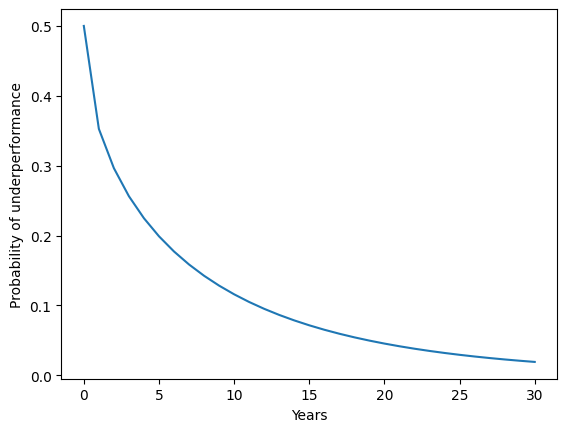

In [25]:
# Question 2.3 Code Here
years=range(0,31)
probability_list=[normal_probability(year, sharpe_ratio) for year in years]

plt.plot(years, probability_list)
plt.xlabel('Years')
plt.ylabel('Probability of underperformance')

plt.show()


-----

### 3. Full Sample Analysis

Use the sample 1965-{END_YR} to reconsider the 30-year probability. 

As of the end of {END_YR}, calculate the probability of the stock return underperforming the risk-free rate over the next 30 years. 

That is, $R^m_{t,t+h}$ underperforming $R^f_{t,t+h}$ for $0<h\le 30$.

In [31]:
stats_full

r_m_mean        0.115529
r_m_vol         0.186650
r_f_mean        0.031928
r_f_vol         0.008507
r̃_mean         0.083308
r̃_vol          0.187329
r_m_log_mean    0.097821
r_m_log_vol     0.185938
r_f_log_mean    0.031850
r_f_log_vol     0.008473
r̃_log_mean     0.065673
r̃_log_vol      0.186914
dtype: float64

In [32]:
# Question 3 Code Here
sharpe_ratio_full = (stats_full["r̃_log_mean"])/ stats_full["r̃_log_vol"]
p_full   =   normal_probability(30, sharpe_ratio_full)
print("Probability of underperformance 30 years with full sample: ", p_full)

Probability of underperformance 30 years with full sample:  0.027148593027962055


-----

### 4. In-Sample Estimate of Out-of-Sample Likelihood

Let's consider how things turned out relative to Barnstable's 1999 expectations.

What was the probability (based on the 1999 estimate of $\mu$) that the `h`-year market return, $R^m_{t,t+h}$, would be smaller than that realized in `2000-{END_YR}`? 

**Hint**: You can calculate this as:

$$p = \Phi_{\mathcal{N}}\left(\sqrt{h}\; \frac{\bar{\texttt{r}}_{out-of-sample} - \bar{\texttt{r}}_{\text{in-sample}}}{\sigma_{\text{in-sample}}}\right)$$

where "in-sample" denotes 1965-1999 and "out-of-sample" denotes 2000-{END_YR}.

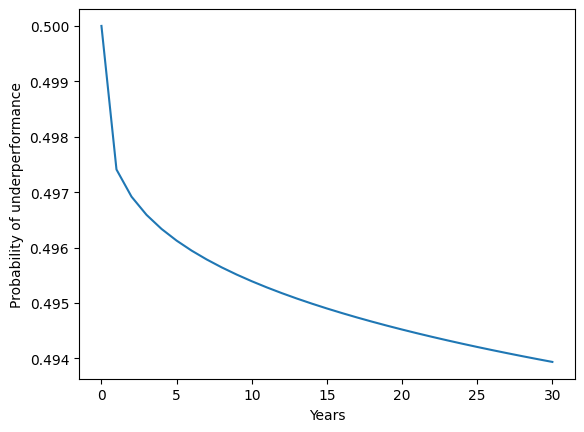

In [34]:
# Question 4 Code Here
r_in_sample=stats_65_99["r̃_log_mean"]
r_out_of_sample=stats_00_24["r̃_log_mean"]
v_in_sample=stats_65_99['r̃_log_vol']

sharpe_ratio_final=(r_out_of_sample-r_in_sample)/v_in_sample

years=range(0,31)
probability_list_final=[normal_probability(np.sqrt(year), sharpe_ratio_final) for year in years]

plt.plot(years, probability_list_final)
plt.xlabel('Years')
plt.ylabel('Probability of underperformance')

plt.show()